<a href="https://colab.research.google.com/github/wenjie-hoo/nn_uwr_22/blob/main/Assignment1_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 07.03.2023
- get at least another **2** points (see problem 8) by Tuesday, 14.03.2023 
- remaining points: last lab session before or on Thursday, <s>16</s>23.03.2023

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (that they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

## Problem 8 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

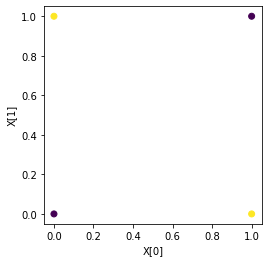

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(loc=0, scale=0.5, size=self.W1.shape)
        self.b1 = np.random.normal(loc=0, scale=0.5, size=self.b1.shape)
        self.W2 = np.random.normal(loc=0, scale=0.5, size=self.W2.shape)
        self.b2 = np.random.normal(loc=0, scale=0.5, size=self.b2.shape)

    def entropy_loss(self, y, yhat):
        loss = -0.5 * (y - yhat) ** 2
        return loss
    
    def forward(self, X, Y=None, do_backward=False):
        A1 = np.dot(X,self.W1.T) + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # O1 = relu(A1)
        A2 = np.dot(O1,self.W2.T) + self.b2

        O2 = sigmoid(A2)

        if Y is not None:
            # loss = self.entropy_loss(Y, O2)
            loss =  -Y * np.log(O2) - (1 - Y) * np.log(1 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = np.dot(A2_grad.T, O1)
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * (1 - O1) * O1
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = np.dot(A1_grad.T, X)
            
        return O2, loss

In [ ]:
net = SmallNet(2, 2, dtype=np.float64)
# net.W1 = np.array([[10.0, -10.0], [-10.0, 10.0]], dtype=np.float64)
# net.b1 = np.array([[-5.0], [15.0]], dtype=np.float64)
# net.W2 = np.array([[1.0], [-2.0]], dtype=np.float64)
# net.b2 = np.array([0.0], dtype=np.float64)

predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.47341085672128785
XORnet([0. 1.]) = 0.48791910665277993
XORnet([1. 0.]) = 0.4774972939544908
XORnet([1. 1.]) = 0.49026652832187406


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 0.01  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        grad = getattr(net, param_name + "_grad")
        param[:] = param - alpha * grad

after 0 steps 	loss=0.755172414736476
after 5000 steps 	loss=0.668724592122792
after 10000 steps 	loss=0.6079890483258374
after 15000 steps 	loss=0.5038184400481488
after 20000 steps 	loss=0.3526862235181485
after 25000 steps 	loss=0.20059578671728884
after 30000 steps 	loss=0.11313886700234282
after 35000 steps 	loss=0.0708293532697834
after 40000 steps 	loss=0.04896580250452992
after 45000 steps 	loss=0.036408999356796555
after 50000 steps 	loss=0.02851825363135513
after 55000 steps 	loss=0.023201602037453164
after 60000 steps 	loss=0.01942180922479569
after 65000 steps 	loss=0.01661959217830082
after 70000 steps 	loss=0.014471653447218956
after 75000 steps 	loss=0.012780105793970487
after 80000 steps 	loss=0.011417955103618496
after 85000 steps 	loss=0.010300415706797062
after 90000 steps 	loss=0.009368958488187109
after 95000 steps 	loss=0.00858201016829561


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.005456417855537667
XORnet([0. 1.]) = 0.9921943096491115
XORnet([1. 0.]) = 0.9922559278670182
XORnet([1. 1.]) = 0.010499823575442874


In [ ]:
def train_and_test_net(hidden_dim):
    net = SmallNet(3, hidden_dim, dtype=np.float64)
    
    alpha = 0.01
    for i in range(10000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            param[:] -= alpha * getattr(net, param_name + "_grad")

    # predictions, loss = net.forward(X, Y, do_backward=True)
    # for x, p in zip(X, predictions):
    #     print(f"XORnet({x}) = {p[0]}")
    
    correct = 0
    for x, y_true in zip(X3, Y3):
        y_pred, loss = net.forward(x, y_true)
        print(y_pred)
        if abs(y_true - y_pred) < 0.5:
            correct += 1
    success_rate = correct / len(X3)
    
    return success_rate

X3 = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,0]])
Y3 = np.array([[0], [1], [1], [0]])
# Test the function for different hidden dimensions
for hidden_dim in [2, 3, 5, 10, 20]:
    success_rate = train_and_test_net(hidden_dim)
    print(f"Success rate with hidden_dim={hidden_dim}: {success_rate}")


[0.08307413]
[0.90528713]
[0.90539112]
[0.03985155]
Success rate with hidden_dim=2: 1.0
[0.06514945]
[0.95037625]
[0.94654862]
[0.04326157]
Success rate with hidden_dim=3: 1.0
[0.04507146]
[0.96820308]
[0.9662581]
[0.02302458]
Success rate with hidden_dim=5: 1.0
[0.0324135]
[0.9725492]
[0.96871963]
[0.02396492]
Success rate with hidden_dim=10: 1.0
[0.02378624]
[0.98256368]
[0.97780226]
[0.01715259]
Success rate with hidden_dim=20: 1.0


## Problem 4


In [ ]:
class SmallNet_4:
    def __init__(self):
        np.random.seed(1)
        self.w1 = 2 * np.random.random((3, 4)) - 1
        self.w_o = 2 * np.random.random((4, 1)) - 1
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            h1 = np.dot(X, self.w1)
            o1 = self.relu(h1)
            h2 = np.dot(o1, self.w_o)
            output = self.relu(h2)

            error = y - output
            d_output = error * self.relu_derivative(output)
            error_h1 = d_output.dot(self.w_o.T)
            d_hidden1 = error_h1 * self.relu_derivative(o1)

            self.w_o += learning_rate * o1.T.dot(d_output)
            self.w1 += learning_rate * X.T.dot(d_hidden1)

            loss = np.mean(np.abs(error))
            if epoch %500 ==0:
                print(f"after {epoch} steps \tloss={loss}")

        return losses

    def predict(self, X):
        h1 = np.dot(X, self.w1)
        o1 = self.relu(h1)
        output_layer_input = np.dot(o1, self.w_o)
        y_pred = self.relu(output_layer_input).round().astype(int)
        return y_pred


In [ ]:
X_train = np.random.randint(2, size=(1000, 3))
y_train = np.logical_xor(np.logical_xor(X_train[:,0], X_train[:,1]), X_train[:,2]).reshape(-1, 1)

model = SmallNet_4()
loss = model.train(X_train, y_train, epochs=10000, learning_rate =0.1)

X_test = np.array([[0,0,0], [1,0,1], [1,1,1], [0,1,0]])
y_test = np.logical_xor(np.logical_xor(X_test[:,0], X_test[:,1]), X_test[:,2]).reshape(-1, 1)

y_pred = model.predict(X_test)

for x, p in zip(y_test, y_pred):
    print(f"XORnet({x}) = {p[0]}")


after 0 steps 	loss=0.4840197436804845
after 500 steps 	loss=0.496
after 1000 steps 	loss=0.496
after 1500 steps 	loss=0.496
after 2000 steps 	loss=0.496
after 2500 steps 	loss=0.496
after 3000 steps 	loss=0.496
after 3500 steps 	loss=0.496
after 4000 steps 	loss=0.496
after 4500 steps 	loss=0.496
after 5000 steps 	loss=0.496
after 5500 steps 	loss=0.496
after 6000 steps 	loss=0.496
after 6500 steps 	loss=0.496
after 7000 steps 	loss=0.496
after 7500 steps 	loss=0.496
after 8000 steps 	loss=0.496
after 8500 steps 	loss=0.496
after 9000 steps 	loss=0.496
after 9500 steps 	loss=0.496
XORnet([False]) = 0
XORnet([False]) = 0
XORnet([ True]) = 0
XORnet([ True]) = 0


## Problem 5

In [ ]:
class SmallNet_5:
    def __init__(self):
        np.random.seed(1)
        self.w1 = 2 * np.random.random((3, 4)) - 1
        self.w2 = 2 * np.random.random((4, 4)) - 1
        self.weights_output = 2 * np.random.random((4, 1)) - 1
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            # forward
            h1 = np.dot(X, self.w1)
            h1_o = self.sigmoid(h1)
            h2 = np.dot(h1_o, self.w2)
            h2_o = self.sigmoid(h2)
            out_lay = np.dot(h2_o, self.weights_output)
            output = self.sigmoid(out_lay)
            # back
            error = y - output
            d_output = error * self.sigmoid_derivative(output)
            error_h2 = d_output.dot(self.weights_output.T)
            d_h2 = error_h2 * self.sigmoid_derivative(h2_o)
            error_h1 = d_h2.dot(self.w2.T)
            d_h1 = error_h1 * self.sigmoid_derivative(h1_o)

            # Update
            self.weights_output += learning_rate * h2_o.T.dot(d_output)
            self.w2 += learning_rate * h1_o.T.dot(d_h2)
            self.w1 += learning_rate * X.T.dot(d_h1)

            loss = np.mean(np.abs(error))
            if epoch %500 ==0:
                print(f"after {epoch} steps \tloss={loss}")

        return losses

    def predict(self, X):
        h1 = np.dot(X, self.w1)
        h1_o = self.sigmoid(h1)
        h2 = np.dot(h1_o, self.w2)
        h2_o = self.sigmoid(h2)
        out_layer = np.dot(h2_o, self.weights_output)
        y_pred = self.sigmoid(out_layer).round().astype(int)
        return y_pred


In [ ]:
X_train = np.random.randint(2, size=(1000, 3))
y_train = np.logical_xor(np.logical_xor(X_train[:,0], X_train[:,1]), X_train[:,2]).reshape(-1, 1)

model = SmallNet_5()
loss = model.train(X_train, y_train, learning_rate =0.04, epochs=10000)

X_test = np.array([[0,0,0], [1,0,1], [1,1,1], [0,1,0]])
y_test = np.logical_xor(np.logical_xor(X_test[:,0], X_test[:,1]), X_test[:,2]).reshape(-1, 1)

y_pred = model.predict(X_test)

for x, p in zip(y_test, y_pred):
    print(f"XORnet({x}) = {p[0]}")

after 0 steps 	loss=0.4993151789594342
after 500 steps 	loss=0.013115668442630601
after 1000 steps 	loss=0.007648573995847316
after 1500 steps 	loss=0.005856573200206975
after 2000 steps 	loss=0.004893343157986724
after 2500 steps 	loss=0.004272474351748674
after 3000 steps 	loss=0.0038311750750475017
after 3500 steps 	loss=0.0034975456816225495
after 4000 steps 	loss=0.0032343260724606495
after 4500 steps 	loss=0.003020054146608399
after 5000 steps 	loss=0.0028413960876415745
after 5500 steps 	loss=0.002689581796520007
after 6000 steps 	loss=0.002558579615418206
after 6500 steps 	loss=0.0024440895203830973
after 7000 steps 	loss=0.0023429539939145154
after 7500 steps 	loss=0.0022527963054048326
after 8000 steps 	loss=0.002171789347793417
after 8500 steps 	loss=0.0020985028222470195
after 9000 steps 	loss=0.0020317992418431284
after 9500 steps 	loss=0.0019707613545642258
XORnet([False]) = 0
XORnet([False]) = 0
XORnet([ True]) = 1
XORnet([ True]) = 1


## Problem 6

## Problem 7